In [1]:
import pandas as pd

df = pd.read_csv('tract_data.csv')

air_quality_columns = df['Air_Quality_Tooltip'].str.split('<br>', expand=True)
air_quality_columns = air_quality_columns.iloc[:, :-1]

air_quality_columns.columns = ['AQI_OZONE', 'AQI_PM10', 'AQI_PM2.5', 'CategoryName_OZONE', 'CategoryName_PM10', 'CategoryName_PM2.5', 'ZipCode']

def extract_value(row, col_name):
    try:
        value = row.split(f'{col_name}: ')[1]
    except IndexError:
        value = None
    return value

for col in air_quality_columns.columns:
    air_quality_columns[col] = air_quality_columns.apply(lambda row: extract_value(row[col], col), axis=1)

df = pd.concat([df, air_quality_columns], axis=1)
df.drop(columns=['Air_Quality_Tooltip'], inplace=True)
df.head()


,FID,Name,TotChild,OlderAdult,MedIllnes,POC2,LEP,Low_to_No,TotDis,MBTA_Stops_Count,AQI_OZONE,AQI_PM10,AQI_PM2.5,CategoryName_OZONE,CategoryName_PM10,CategoryName_PM2.5,ZipCode
0,1,Mission Hill,60,331,2131.22,1755,1522,1191,470,5,32.30232558139535,14.156,33.43157296990346,Good,Good,Good,2115
1,2,Fenway,77,56,2201.14,1749,2443,2387,299,0,32.30232558139535,14.156,33.43157296990346,Good,Good,Good,2115
2,3,Back Bay,281,390,1214.76,447,462,72,84,0,32.30232558139535,14.156,33.43157296990346,Good,Good,Good,2116
3,4,Back Bay,86,285,1014.20,320,472,187,45,1,32.30232558139535,14.156,33.43157296990346,Good,Good,Good,2116
4,5,Fenway,13,36,1181.78,1039,931,895,131,1,32.30232558139535,14.156,33.43157296990346,Good,Good,Good,2215


In [2]:
import pandas as pd

def avg_aqi(values):
    numeric_values = pd.to_numeric(values, errors='coerce')
    return numeric_values.mean()

def most_common(series):
    return series.mode().iloc[0]


grouped = df.groupby('Name').agg({
    'TotChild': 'sum',
    'OlderAdult': 'sum',
    'MedIllnes': 'sum',
    'POC2': 'sum',
    'LEP': 'sum',
    'Low_to_No': 'sum',
    'TotDis': 'sum',
    'MBTA_Stops_Count': 'sum',
    'AQI_OZONE': avg_aqi,
    'AQI_PM10': avg_aqi,
    'AQI_PM2.5': avg_aqi,
    'CategoryName_OZONE': most_common,
    'CategoryName_PM10': most_common,
    'CategoryName_PM2.5': most_common,
    'ZipCode': 'first'
}).reset_index()

grouped.to_csv('result.csv', index=False) 
grouped.head()


,Name,TotChild,OlderAdult,MedIllnes,POC2,LEP,Low_to_No,TotDis,MBTA_Stops_Count,AQI_OZONE,AQI_PM10,AQI_PM2.5,CategoryName_OZONE,CategoryName_PM10,CategoryName_PM2.5,ZipCode
0,Allston,173,144,2831.85,3011,3444,3300,400,4,32.302326,14.156,33.431573,Good,Good,Good,2134
1,Back Bay,1686,3759,11842.96,6923,9075,5316,1892,6,32.302326,14.156,33.431573,Good,Good,Good,2116
2,Bay Village,1249,1711,4292.93,6008,5640,3929,1122,7,32.302326,14.156,33.431573,Good,Good,Good,2116
3,Brighton,4244,5847,23936.80,19768,22914,17067,5502,8,32.302326,14.156,33.431573,Good,Good,Good,2135
4,Charlestown,3301,1811,6461.47,3981,5968,4157,1535,2,32.302326,14.156,29.433603,Good,Good,Good,2129


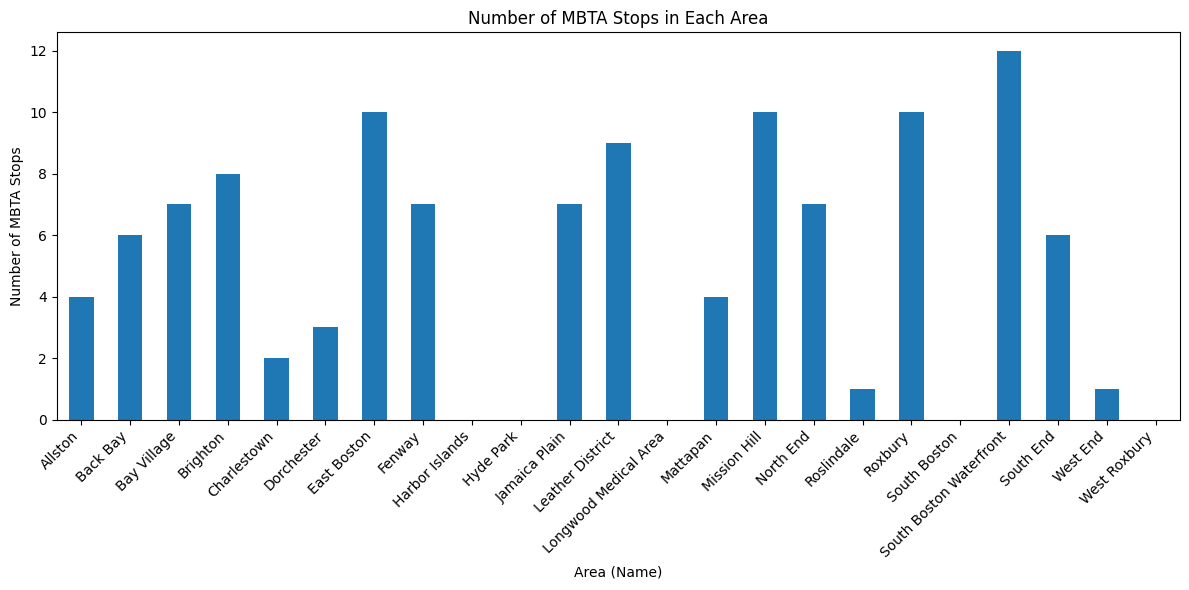

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('result.csv')

stops_by_area = df.groupby('Name')['MBTA_Stops_Count'].sum()

plt.figure(figsize=(12, 6))  

stops_by_area.plot(kind='bar')
plt.xlabel('Area (Name)')
plt.ylabel('Number of MBTA Stops')
plt.title('Number of MBTA Stops in Each Area')

plt.xticks(rotation=45, ha="right")

plt.tight_layout() 

plt.show()